# Linear Regression

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd

import numpy as np
from numpy.polynomial.polynomial import polyval
import matplotlib.pyplot as plt
data = datasets.load_boston()

## One-dimensional

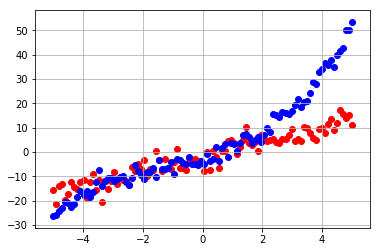

In [2]:
n = 100
x = np.linspace(-5,5, n)

a = 3; b = -2.5;
y = a*x + b
yn = y + 3*np.random.randn(n) #add noise

p = [b, a, 0.6, 0.2]
y2 = polyval(x, p)
y2n = y2 + 2*np.random.randn(n)

fig, ax = plt.subplots()
ax.scatter(x, yn, c ='r')
ax.scatter(x, y2n, c ='b')
plt.grid(True)
plt.show()

Simple linear regression with sklearn.linear_model.LinearRegression()

Regression line: y= 3.07x + -2.03
Mse: 5.3186, R squared: 0.9306


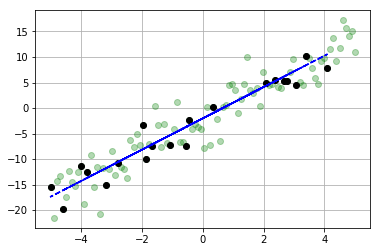

In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x, yn, test_size=0.2, random_state=42, shuffle=True)
#x and y have to be of shape (n, d); here: d = 1
x_train = x_train.reshape(-1,1) 
x_test = x_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

#train model
lm = linear_model.LinearRegression()
lm.fit (x_train, y_train)  
coef = lm.coef_[0][0]
itc = lm.intercept_[0]
print("Regression line: y = {:.2f}x + {:.2f}".format(coef, itc))

#make predictions
y_pred = lm.predict(x_test) 

#evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mse: {:.4f}, R squared: {:.4f}".format(mse, r2))
#R squared alternative: print("Score", lm.score(x_test, y_test))

#plot outputs
#plt.scatter(x_test, y_test, color='black')
#plt.plot(x_test, y_pred, color='blue', linewidth=2)
fig, ax = plt.subplots()
ax.plot(x, yn, 'go', alpha = 0.3)
ax.plot(x_test, y_test, 'ko', ms=6) #ax.scatter(x_test, y_test, c ='black')
ax.plot(x_test, y_pred, 'b--')
plt.grid(True)
plt.show()

## Multiple linear regression with Pandas and sklearn 


In [4]:
data = datasets.load_boston()
#print(data.DESCR)
df = pd.DataFrame(data.data, columns=data.feature_names)
#print(df.describe(include='all'))
target = pd.DataFrame(data.target, columns=["MEDV"]) #housing value
#print(target.describe())

In [22]:
#X = df[['RM', 'LSTAT']]
X = df
Y = target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

#train model
lm = linear_model.LinearRegression()
lm.fit (x_train, y_train)  
coef = lm.coef_[0]; 
itc = lm.intercept_[0]
print("Regression line")
for e, col in enumerate(x_train):
    print("{:.2f} * {} + ".format(coef[e], col), end='')
print("{:.2f}".format(itc))

#evaluate
print("R2: {:.4f}".format(lm.score(x_test, y_test)))

Regression line
-0.11 * CRIM + 0.03 * ZN + 0.04 * INDUS + 2.79 * CHAS + -17.24 * NOX + 4.43 * RM + -0.01 * AGE + -1.45 * DIS + 0.26 * RAD + -0.01 * TAX + -0.92 * PTRATIO + 0.01 * B + -0.51 * LSTAT + 30.29
R2: 0.6685


In [18]:
#Use only  one variable
X = df["RM"]
y = target
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
x_train = x_train.reshape(-1,1) 
x_test = x_test.reshape(-1,1)
#train model
lm = linear_model.LinearRegression()
lm.fit (x_train, y_train)  
coef = lm.coef_[0][0]; 
itc = lm.intercept_[0]
print("Regression line: y = {:.2f}x + {:.2f}".format(coef, itc))

#evaluate
print("R2: {:.4f}".format(lm.score(x_test, y_test)))

Regression line: y = 9.35x + -36.25
R2: 0.3708


/Users/sabrina/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/sabrina/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [35]:
X = df
Y = target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

#Normal ridge regression
#train model
ridge = linear_model.Ridge(alpha = .5)
ridge.fit (x_train, y_train)  
print(ridge.coef_[0])
print(ridge.intercept_[0])

#evaluate
print("R2: {:.4f}".format(ridge.score(x_test, y_test)))

####Ridge regression with cross validation of regularization params
#train model
ridge2 = linear_model.RidgeCV(alphas=(0.001, 0.01, 0.1,1.0, 10.0))
ridge2.fit (x_train, y_train)  
print(ridge2.coef_[0])
print(ridge2.intercept_[0])
print(ridge2.alpha_)

#evaluate
print("R2: {:.4f}".format(ridge2.score(x_test, y_test)))


[-1.09866684e-01  3.14453108e-02  1.95376263e-02  2.64510844e+00
 -1.22999664e+01  4.45500256e+00 -1.00957677e-02 -1.37794048e+00
  2.53055124e-01 -1.11627059e-02 -8.59968531e-01  1.26390557e-02
 -5.18719664e-01]
26.92349103955776
R2: 0.6673
[-1.12390148e-01  3.01182631e-02  4.01418498e-02  2.78317373e+00
 -1.71033229e+01  4.43326962e+00 -6.34863334e-03 -1.44652119e+00
  2.61854471e-01 -1.06533572e-02 -9.14818435e-01  1.24568887e-02
 -5.09596960e-01]
30.194064885700477
0.01
R2: 0.6685


General Linear Model: 
multiple target variables
combinations of predictors
generalized inverse (predictors not independent (correlations)

In [ ]:
Generalized Linear Model:
Different distributions of target possible
link function